In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.io
import numpy as np
import pickle
#import seaborn
fileName="Train_Record.pkl"
lstm_path1="../5_rawNewPaper/compare_4feature_LSTM/"+fileName
gru_path1="../5_rawNewPaper/compare_4feature_GRU/"+fileName
dbilstm_path1="../4_NewPaper_revision/compare_6feature_bilstm_/"+fileName
dlstm_path1="../4_NewPaper_revision/compare_6feature_lstm_/"+fileName
clstm_path1="./CommonOn_NewPaper/"+"clstm_3_1_dia=1.pkl"
#clstm_path1="../5_rawNewPaper/"+"Train_Record70.pkl"
cnn_path1="./CommonOn_NewPaper/"+"cnn2_2.pkl"
params={
    'axes.labelsize': '22',
    'xtick.labelsize':'22',
    'ytick.labelsize':'22',
    'lines.linewidth':2.5 ,
    'legend.fontsize': '22',
    'figure.figsize'   : '12,8'    # set figure size
}

In [2]:

def process_old_data(Path):
    with open(Path, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        all_score, all_loss = u.load()
    x=np.array(all_loss)
    x=np.mean(all_loss,0)
    print(x.shape)
    return x
def process_new_data(Path):
    with open(Path, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        all_score, all_loss = u.load()
    return x
lstm=process_old_data(lstm_path1)
gru=process_old_data(gru_path1)
dlstm=process_old_data(dlstm_path1)
dbilstm=process_old_data(dbilstm_path1)

(199, 1)
(199, 1)
(29, 1)
(29, 1)


In [51]:
import librosa 
dbilstm_=dbilstm
dbilstm_=dbilstm_.reshape((1,-1))
dbilstm_=np.asfortranarray(dbilstm_)
print(dbilstm_.shape)
dbilstm_s=[]
for i in dbilstm_[0]:
        dbilstm_s.append(i*7)
dbilstm_s=np.array(dbilstm_s)    
print(dbilstm_s.shape)

(1, 29)
(29,)


In [44]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
cnn=process_old_data(cnn_path1)
def process_torch(cnn):
    y=[]
    for i in cnn:
        y.append(i.cpu().detach().numpy().tolist())
    return y
cnn_=process_torch(cnn)
#print(cnn_)

cnn_s=[]
max=200
for i in range(1,max):
    j=len(cnn_)//max
    cnn_s.append(np.mean(cnn_[i*j-50:i*j+50]))
cnn_s=np.asarray(cnn_s)
print(cnn_s.shape)


(1500,)
(199,)


In [45]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
clstm=process_old_data(clstm_path1)
clstm_=process_torch(clstm)
#print(cnn_)

clstm_s=[]
max=200
for i in range(1,max):
    j=len(cnn_)//max
    clstm_s.append(np.mean(clstm_[i*j-100:i*j+100]))
clstm_s=np.asarray(clstm_s)
print(clstm_s.shape)

(9000,)
(199,)


In [46]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, utils
# clstm=process_old_data(clstm_path1)
# clstm_=clstm
# clstm_=clstm_.reshape((1,-1))
# clstm_=np.asfortranarray(clstm_)
# print(clstm_.shape)


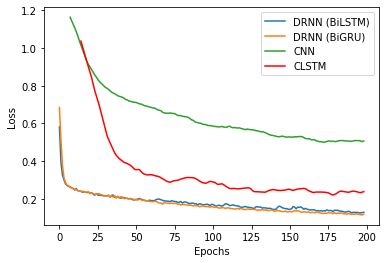

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(clstm_.T[:200],label="clstm")
plt.plot(lstm,label="DRNN (BiLSTM)")
plt.plot(gru,label="DRNN (BiGRU)")
#plt.plot(dbilstm_s.T,label="Duration-LSTM")
plt.plot(cnn_s.T[:200],label="CNN")
plt.plot(clstm_s.T[:200],'r',label="CLSTM")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.show()
plt.savefig("clstm_4.pdf",dpi = 1000,bbox_inches='tight')